### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [61]:
data = pd.read_csv('data/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [62]:
#print(data.info())
#print(data.nunique())

print("Number of records:", data.shape[0])
print("Number of columns:", data.shape[1])

# Check for duplicates - duplicates are valid for this datasets but still checking
duplicates = data[data.duplicated()]
print(f"Number of duplicate records: {duplicates.shape[0]}")
#print(duplicates.to_markdown())

# Print data stats 
print("\nData stats:\n")
print(data.describe(include='all').to_markdown())

#Check for missing values
missing = data.isnull().sum()[data.isnull().any()]
#% missing values per column
missing_percent = (missing/len(data)) * 100

#summary of missing values
missing_summary = pd.DataFrame({
    '#Missing': missing,
    '%Missing': missing_percent
}).sort_values(by='#Missing', ascending=False)

print("\nColumns with missing values:\n")
print(missing_summary.to_markdown())

Number of records: 12684
Number of columns: 26
Number of duplicate records: 74

Data stats:

|        | destination     | passanger   | weather   |   temperature | time   | coupon       | expiration   | gender   |   age | maritalStatus   |   has_children | education                | occupation   | income          | car                    | Bar   | CoffeeHouse   | CarryAway   | RestaurantLessThan20   | Restaurant20To50   |   toCoupon_GEQ5min |   toCoupon_GEQ15min |   toCoupon_GEQ25min |   direction_same |   direction_opp |            Y |
|:-------|:----------------|:------------|:----------|--------------:|:-------|:-------------|:-------------|:---------|------:|:----------------|---------------:|:-------------------------|:-------------|:----------------|:-----------------------|:------|:--------------|:------------|:-----------------------|:-------------------|-------------------:|--------------------:|--------------------:|-----------------:|----------------:|-------------:|
| count

In [63]:
# Checking correlations
data_encoded = pd.get_dummies(data, drop_first=True)
corr = data_encoded.corr()
corr = corr['Y'].drop('Y')  # drop self-correlation

# Sort by correlation value
corr = corr.sort_values(ascending=False)
print("Top 5 +ve correlations with Y:\n")
print(corr.head(5).to_markdown())

print("\nTop 5 +ve correlations with Y:\n")
print(corr.tail(5).to_markdown())

Top 5 +ve correlations with Y:

|                              |        Y |
|:-----------------------------|---------:|
| coupon_Carry out & Take away | 0.162635 |
| coupon_Restaurant(<20)       | 0.148542 |
| destination_No Urgent Place  | 0.130702 |
| passanger_Friend(s)          | 0.125671 |
| weather_Sunny                | 0.104446 |

Top 5 +ve correlations with Y:

|                     |           Y |
|:--------------------|------------:|
| coupon_Coffee House |  -0.0947308 |
| toCoupon_GEQ25min   |  -0.103633  |
| CoffeeHouse_never   |  -0.121036  |
| expiration_2h       |  -0.12992   |
| toCoupon_GEQ5min    | nan         |


3. Decide what to do about your missing data -- drop, replace, other...

In [64]:
# Some fields have missing data car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50
#check the values 
cols_with_missing_data = data.columns[data.isnull().any()]
for col in cols_with_missing_data:
    print(f"{col}: {data[col].dropna().unique()}")

#Display the recors with missing values
# pd.set_option('display.max_columns', None)
#data[data.isnull().any(axis=1)]

#car - The type of vehicledriven by the user. Over 99% missing data, dropping the column
#toCoupon_GEQ5min - drop the column as value is true for all records 
#keep direction_same & drop direction_opp
cols_to_drop = ['car', 'toCoupon_GEQ5min', 'direction_opp']
data = data.drop(columns=cols_to_drop, axis=1)

#all other colums replace missing with 'Unknown'
unknown_cols = [
    'Bar',
    'CoffeeHouse',
    'CarryAway',
    'RestaurantLessThan20',
    'Restaurant20To50'
]

for col in unknown_cols:
    data[col] = data[col].fillna('Unknown')

#check cleaning
#print(data.isnull().sum())

car: ['Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Bar: ['never' 'less1' '1~3' 'gt8' '4~8']
CoffeeHouse: ['never' 'less1' '4~8' '1~3' 'gt8']
CarryAway: ['4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20: ['4~8' '1~3' 'less1' 'gt8' 'never']
Restaurant20To50: ['1~3' 'less1' 'never' 'gt8' '4~8']


4. What proportion of the total observations chose to accept the coupon?



In [65]:
# 'Y' contains binary values 1 or 0, using value counts 
count = data['Y'].value_counts()
percentage = count/len(data) * 100

summary = pd.DataFrame({'Count': count, 'Percentage': percentage}).round(2)
summary.reset_index(inplace=True)
# Map the Y values to readable labels
summary['Y'] = summary['Y'].map({1: 'Accepted', 0: 'Rejected'})
print("\nOverall acceptance rate of coupons:\n") 
print(summary.to_markdown(index=False)) 


Overall acceptance rate of coupons:

| Y        |   Count |   Percentage |
|:---------|--------:|-------------:|
| Accepted |    7210 |        56.84 |
| Rejected |    5474 |        43.16 |


5. Use a bar plot to visualize the `coupon` column.

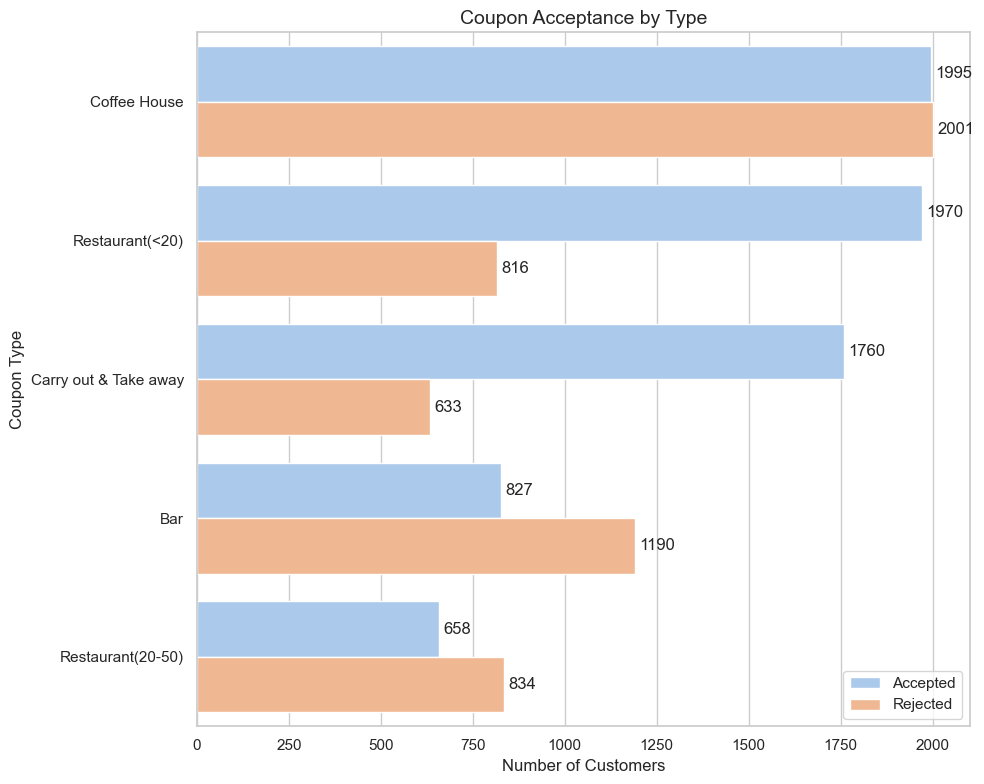

|    | coupon                |   Total |   Accepted |   Rejected |   Acceptance % |
|---:|:----------------------|--------:|-----------:|-----------:|---------------:|
|  2 | Coffee House          |    3996 |       1995 |       2001 |          49.92 |
|  4 | Restaurant(<20)       |    2786 |       1970 |        816 |          70.71 |
|  1 | Carry out & Take away |    2393 |       1760 |        633 |          73.55 |
|  0 | Bar                   |    2017 |        827 |       1190 |          41    |
|  3 | Restaurant(20-50)     |    1492 |        658 |        834 |          44.1  |


In [66]:
# Total counts
total_counts = data.groupby('coupon')['Y'].count()

# Accepted counts
accepted_counts = data.groupby('coupon')['Y'].sum()

# Combine into a DataFrame
summary = pd.DataFrame({
    'Total': total_counts,
    'Accepted': accepted_counts
})

summary['Rejected'] = summary['Total'] - summary['Accepted']
summary['Acceptance %'] = (summary['Accepted'] / summary['Total'] * 100).round(2)
summary = summary.reset_index()


# Sort ascending by total count
summary = summary.sort_values(by='Total', ascending=False)

# melt for grouped bar chart
summary_long = summary.melt(
    id_vars='coupon',
    value_vars=['Accepted', 'Rejected'],
    var_name='Acceptance',
    value_name='Count'
)

# Create the plot
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=summary_long,
    x='Count',
    y='coupon',
    hue='Acceptance',
    palette='pastel'
)

# Add title and labels
plt.title('Coupon Acceptance by Type', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Coupon Type', fontsize=12)
plt.legend(loc='lower right')

# Add labels on bars for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

print(summary.to_markdown())

6. Use a histogram to visualize the temperature column.

[55 80 30]


Text(0, 0.5, 'Frequency')

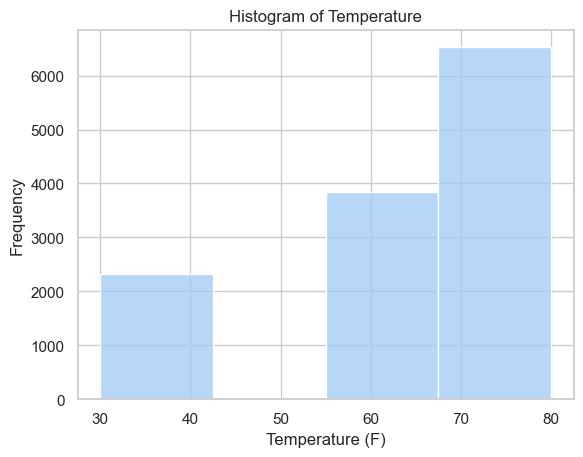

In [67]:
print(data['temperature'].unique())
#just 3 values
sns.histplot(data=data, x='temperature', bins=4, color=sns.color_palette("pastel")[0],)

plt.title('Histogram of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
#filter bar coupon records 
df_bar = data.query("coupon == 'Bar'")
#df_bar.head()

2. What proportion of bar coupons were accepted?


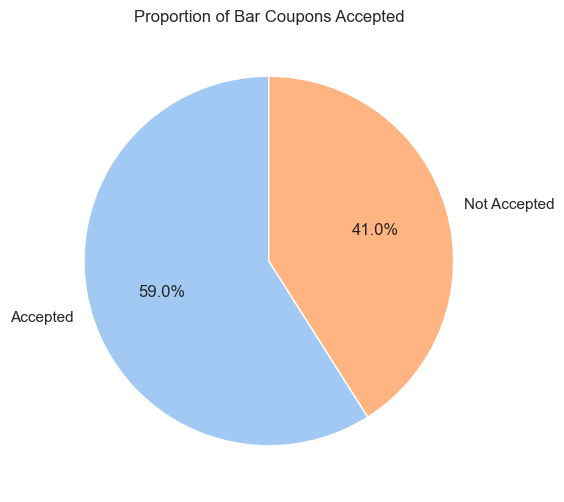

In [69]:
#create a copy of df
df_bar_coupons = df_bar.copy()

#find number of bar coupons accepted
acceptance_count = df_bar_coupons['Y'].value_counts()
#find % of bar coupons accepted
acceptance_percentage = acceptance_count/len(df_bar_coupons) * 100

#create dataframe and display
acceptance_count.rename({1: 'Accepted', 0: 'Rejected'})

# Seaborn pastel palette
colors = sns.color_palette('pastel')

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    acceptance_count,
    labels=['Accepted', 'Not Accepted'],
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportion of Bar Coupons Accepted', fontsize=12)
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [70]:
#Bar coupon values are: ['never' 'less1' '1~3' 'gt8' '4~8']

#create a copy of df
df_bar_coupons = df_bar.copy()

df_bar_coupons['bar_visits'] = np.where(df_bar['Bar'].isin(['4~8', 'gt8']), '> 3 times', '<= 3 times')

#calculate accepteance %
total = df_bar_coupons.groupby('bar_visits')['Y'].count()
accepted_counts = df_bar_coupons.groupby('bar_visits')['Y'].sum()
accepted_percentage = (accepted_counts / total * 100).round(2)

acceptance = pd.DataFrame({
    'Total': total,
    'Accepted': accepted_counts,
    'Acceptance %': accepted_percentage
}).reset_index()

acceptance


#people who go to bars more than 3 times a month are much more likely to accept bar coupons (~77%) than those who go less frequently (~37%)
#bar visits is a strong predictor of bar coupon acceptance

,bar_visits,Total,Accepted,Acceptance %
0,<= 3 times,1818,674,37.07
1,> 3 times,199,153,76.88


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [71]:
#start with the filter bar coupons
#Bar coupon values are: ['never' 'less1' '1~3' 'gt8' '4~8']
#Age - ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

df_bar_coupons = df_bar.copy()
#print(df_bar_coupons['age'].unique())
#print(df_bar['Bar'].unique())


df_bar_coupons['bar_visits'] = 'All Others'  
df_bar_coupons.loc[
    (df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~df_bar_coupons['age'].isin(['below21', '21'])),
    'bar_visits'
] = 'Frequent Bar-Goer'

#df_bar_coupons.sample(2)

#gt1_counts = df_bar_coupons.query ("bar_visits == 'Frequent Bar-Goer'").value_counts()
#gt1_percentage = gt1_counts/len(df_bar_coupons) * 100


#calculate acceptance % 
totals = df_bar_coupons.groupby('bar_visits')['Y'].count()
accepted_counts = df_bar_coupons.groupby('bar_visits')['Y'].sum()
accepted_percentage = (accepted_counts / totals * 100).round(2)

bar_acceptance = pd.DataFrame({
    'Total': totals,
    'Accepted': accepted_counts,
    'Acceptance %': accepted_percentage
}).reset_index()

#display
bar_acceptance

,bar_visits,Total,Accepted,Acceptance %
0,All Others,1597,535,33.50
1,Frequent Bar-Goer,420,292,69.52


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [72]:
df_bar_coupons = df_bar.copy()
#['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
#print(df_bar_coupons['passanger'].unique())
#print(df_bar_coupons['occupation'].unique())
#Farming Fishing & Forestry

df_bar_coupons['bar_visits'] = 'All Others'  
df_bar_coupons.loc[
    (df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & # goes to bar more than once 
    (~df_bar_coupons['passanger'].isin(['Kid(s)'])) & # passenger not kids
    (~df_bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])) , # occupation not farming
    'bar_visits'
] = 'Frequent Bar-Goer'

#calculate acceptance %
totals = df_bar_coupons.groupby('bar_visits')['Y'].count()
accepted_counts = df_bar_coupons.groupby('bar_visits')['Y'].sum()
accepted_percentage = (accepted_counts / totals * 100).round(2)

bar_acceptance = pd.DataFrame({
    'Total': totals,
    'Accepted': accepted_counts,
    'Acceptance %': accepted_percentage
}).reset_index()


#display
print("Frequent Bar-Goer - No Kid(s) passengers - Non-Farm occupation\n")
bar_acceptance


Frequent Bar-Goer - No Kid(s) passengers - Non-Farm occupation



,bar_visits,Total,Accepted,Acceptance %
0,All Others,1466,434,29.60
1,Frequent Bar-Goer,551,393,71.32


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



| Group                                    |   Total |   Accepted |   Acceptance % |
|:-----------------------------------------|--------:|-----------:|---------------:|
| Bar > 1/month(No Kids, Not Widowed)      |     551 |        393 |          71.32 |
| Bar > 1/month(Age < 30)                  |     345 |        249 |          72.17 |
| Cheap Restaurant > 4/month(Income < 50K) |     344 |        156 |          45.35 |


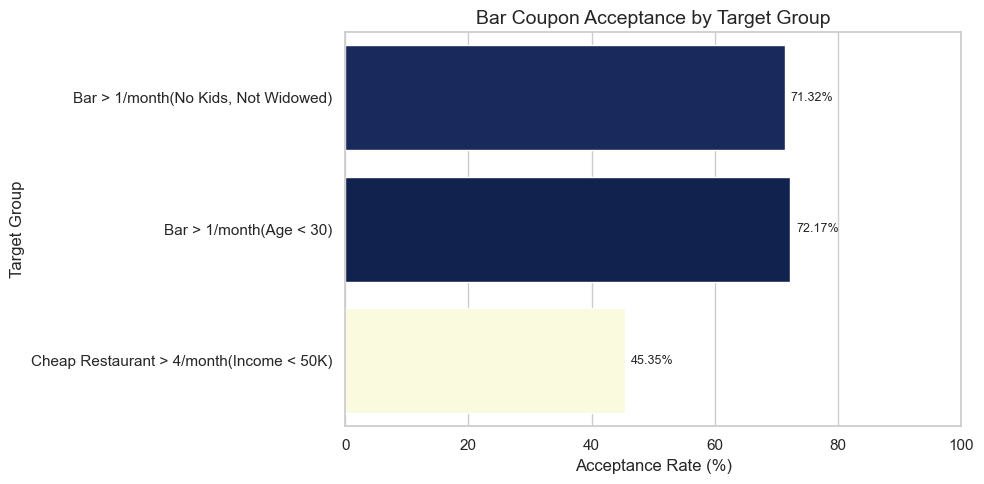

In [73]:
#check unique values
#print(df_bar_coupons['maritalStatus'].unique())
#print(df_bar_coupons['RestaurantLessThan20'].unique())
#print(df_bar_coupons['income'].unique())

df_bar_coupons = df_bar.copy()

#Drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed 
group1 = (
    df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & # goes to bar more than once 
    (~df_bar_coupons['passanger'].isin(['Kid(s)'])) & # passenger not kids
    (~df_bar_coupons['maritalStatus'].isin(['Widowed'])) # not Widowed
)

# Drivers go to bars more than once a month and are under the age of 30
group2 = (
    df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & # goes to bar more than once 
    df_bar_coupons['age'].isin(['below21','21','26']) # under 30 years
)

# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
group3 = (
    df_bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) & # goes to cheap restaurant more than 4 times
    df_bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999','$25000 - $37499', '$37500 - $49999' ]) # income < 50K
)

# func cto alculate acceptance 
def calculate_acceptance(group, name):
    total = group.sum()
    accepted_counts = df_bar_coupons.loc[group, 'Y'].sum()
    accepted_percentage = round((accepted_counts / total) * 100, 2) if total > 0 else None
    return {'Group': name, 'Total': total, 'Accepted': accepted_counts, 'Acceptance %': accepted_percentage}

acceptance = [
    calculate_acceptance(group1, "Bar > 1/month(No Kids, Not Widowed)"),
    calculate_acceptance(group2, "Bar > 1/month(Age < 30)"),
    calculate_acceptance(group3, "Cheap Restaurant > 4/month(Income < 50K)")
]

summary = pd.DataFrame(acceptance)
print(summary.to_markdown(index=False))


plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

x = sns.barplot(
    data=summary,
    x='Acceptance %',
    y='Group',
    hue='Acceptance %',
    palette=sns.color_palette("YlGnBu", as_cmap=True),  # continuous colormap
    legend=False
)

# Add labels to each bar
for i, row in summary.iterrows():
    x.text( row['Acceptance %'] + 1, i, f"{row['Acceptance %']}%", va='center', fontsize=9)

# Formatting
plt.title('Bar Coupon Acceptance by Target Group', fontsize=14)
plt.xlabel('Acceptance Rate (%)', fontsize=12)
plt.ylabel('Target Group', fontsize=12)
plt.xlim(0, 100)  # range 0–100%

plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Summary of Bar Coupon Analysis**

- Overall acceptance of bar coupons is 41%. 
- Frequently bars visitors (over 3 times a month) show higher acceptance of 77%
- Drivers who go to bars at least once a month have high acceptance rate.
- Drivers travelling without kids and not widowed have an acceptance rate of 71%
- Younger drivers (under 30 years) who visit bar at least once a month show a high acceptance of 72% 

The observations suggest that life style factors and habits, especially frequency of visits to bar, is a strong indicator of bar coupon acceptance. Also younger drivers are more likely to accept bar coupons.

Targeting frequent bar visitors will likely increase acceptance rate of bar coupons above 41%. Among frequent bar visitors, targeting the younger drivers should further increase the likelihood of acceptance. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [74]:
#filter bar coupon records 
df_coffee = data.query("coupon == 'Coffee House'").copy()
df_coffee['accepted'] = df_coffee['Y'].map({1: 'Accepted', 0: 'Rejected'})
df_coffee.head()

# Overall acceptance rate
total = len(df_coffee)
accepted_count = df_coffee['Y'].sum()
acceptance_percentage = round((accepted_count / total) * 100, 2)

print(f"Overall Coffee House coupon acceptance: {acceptance_percentage}%")

Overall Coffee House coupon acceptance: 49.92%


In [75]:
#Checking unique values in different colums
print(f"Coffee House Visits: {df_coffee['CoffeeHouse'].unique()}")
print(f"Destination: {df_coffee['destination'].unique()}")
print(f"Weather: {df_coffee['weather'].unique()}")
print(f"Temperature: {df_coffee['temperature'].unique()}")
print(f"Time: {df_coffee['time'].unique()}")
print(f"Gender: {df_coffee['gender'].unique()}")
print(f"Same Direction: {df_coffee['direction_same'].unique()}")
print(f"Expiry: {df_coffee['expiration'].unique()}")
print(f"Income: {df_coffee['income'].unique()}")
print(f"Age: {df_coffee['age'].unique()}")
print(f"Gender: {df_coffee['gender'].unique()}")
        

Coffee House Visits: ['never' 'less1' '4~8' '1~3' 'gt8' 'Unknown']
Destination: ['No Urgent Place' 'Home' 'Work']
Weather: ['Sunny' 'Rainy' 'Snowy']
Temperature: [80 55 30]
Time: ['10AM' '2PM' '6PM' '7AM' '10PM']
Gender: ['Female' 'Male']
Same Direction: [0 1]
Expiry: ['2h' '1d']
Income: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Gender: ['Female' 'Male']


In [76]:
#calculate acceptance %
totals = df_coffee.groupby('CoffeeHouse')['Y'].count()
accepted_counts = df_coffee.groupby('CoffeeHouse')['Y'].sum()
accepted_percentage = (accepted_counts / totals * 100).round(2)

coupon_acceptance = pd.DataFrame({
    'Total': totals,
    'Accepted': accepted_counts,
    'Acceptance %': accepted_percentage
}).reset_index()

#order by frequency
order = ['never', 'less1', '1~3', '4~8', 'gt8', 'Unknown']
coupon_acceptance['CoffeeHouse'] = pd.Categorical(coupon_acceptance['CoffeeHouse'], categories=order, ordered=True)
coupon_acceptance = coupon_acceptance.sort_values('CoffeeHouse')

coupon_acceptance.reset_index(drop=True, inplace=True)
print(coupon_acceptance.to_string())

# bar chart using plotly
fig = px.bar(
    coupon_acceptance,
    x='CoffeeHouse',
    y='Acceptance %',
    text='Acceptance %',
    title='Coffee Coupon Acceptance by Frequency of Visit',
    labels={'CoffeeHouse': 'Monthly Visit Frequency', 'Acceptance %': 'Acceptance Rate (%)'},
    category_orders={'CoffeeHouse': order},
    color='Acceptance %', 
    color_continuous_scale='YlGnBu'
)

# Show acceptance % on chart
fig.update_traces(texttemplate='%{text}%', textposition='inside')

# Update layout
fig.update_layout(yaxis=dict(range=[0, 100]), width=700, height=400,  coloraxis_showscale=False, uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

  CoffeeHouse  Total  Accepted  Acceptance %
0       never    927       175         18.88
1       less1   1075       518         48.19
2         1~3   1042       675         64.78
3         4~8    538       369         68.59
4         gt8    342       225         65.79
5     Unknown     72        33         45.83


In [77]:
# Coffee House coupons only
df_coffee = data.query("coupon == 'Coffee House'").copy()

# func to calculate coupon acceptance 
def coupon_acceptance(df, col, order=None):
    totals = df.groupby(col)['Y'].count()
    accepted_counts = df.groupby(col)['Y'].sum()
    accepted_percentage = (accepted_counts / totals * 100).round(2)

    acceptance = pd.DataFrame({
        col: totals.index,
        'Total': totals.values,
        'Accepted': accepted_counts.values,
        'Acceptance %': accepted_percentage.values
    })
    #reorder  
    if order is not None:
        acceptance[col] = pd.Categorical(acceptance[col], categories=order, ordered=True)
        acceptance = acceptance.sort_values(col)

    return acceptance

# set order of values
weather_order = ['Sunny', 'Rainy', 'Snowy']
time_order    = ['7AM', '10AM', '2PM', '6PM', '10PM']
temp_order    = [30, 55, 80]
income_order = [ 
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999',
    '$50000 - $62499',
    '$62500 - $74999',
    '$75000 - $87499',
    '$87500 - $99999',
    '$100000 or More'
]
age_order     = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
destination_order = ['No Urgent Place', 'Home', 'Work']
gender_order  = ['Female', 'Male']
expiration_order  = ['2h', '1d']

# Calculate acceptance for each subplot
coupon_acceptance_weather = coupon_acceptance(df_coffee, 'weather', weather_order)
coupon_acceptance_time = coupon_acceptance(df_coffee, 'time', time_order)
coupon_acceptance_temp = coupon_acceptance(df_coffee, 'temperature', temp_order)
coupon_acceptance_income = coupon_acceptance(df_coffee, 'income', income_order)
coupon_acceptance_age = coupon_acceptance(df_coffee, 'age', age_order)
coupon_acceptance_gender = coupon_acceptance(df_coffee, 'gender', gender_order)
coupon_acceptance_destination = coupon_acceptance(df_coffee, 'destination', destination_order)
coupon_acceptance_direction = coupon_acceptance(df_coffee, 'direction_same')
coupon_acceptance_expiration = coupon_acceptance(df_coffee, 'expiration', expiration_order)

# Create the subplots
fig = make_subplots(
    rows=3, cols=3, shared_yaxes=True,
    subplot_titles=(
        "Acceptance by Weather", "Acceptance by Time", "Acceptance by Temperature",
        "Acceptance by Income", "Acceptance by Age", "Acceptance by Gender",
        "Acceptance by Destination", "Acceptance by Same Direction", "Acceptance by Expiration"
    )
)

# Shared color range
#color_min, color_max = 0, 100

def add_bar_chart(df, xcol, row, col, name):
    fig.add_trace(
        go.Bar(
            x=df[xcol].astype(str),
            y=df['Acceptance %'],
            text=df['Acceptance %'].astype(str) + '%',
            textposition='outside',
            name=name,
            marker=dict(
                color=df['Acceptance %'],
                colorscale='YlGnBu',
                cmin=0,
                cmax=100
            )
        ),
        row=row, col=col
    )

# First row of charts
add_bar_chart(coupon_acceptance_weather, 'weather', 1, 1, 'Weather')
add_bar_chart(coupon_acceptance_time, 'time', 1, 2, 'Time')
add_bar_chart(coupon_acceptance_temp, 'temperature', 1, 3, 'Temperature')

# Second row of charts
add_bar_chart(coupon_acceptance_income, 'income', 2, 1, 'Income')
add_bar_chart(coupon_acceptance_age, 'age', 2, 2, 'Age')
add_bar_chart(coupon_acceptance_gender, 'gender', 2, 3, 'Gender')

# Third row of charts
add_bar_chart(coupon_acceptance_destination, 'destination', 3, 1, 'Destination')
add_bar_chart(coupon_acceptance_direction, 'direction_same', 3, 2, 'Direction')
add_bar_chart(coupon_acceptance_expiration, 'expiration', 3, 3, 'Expiration')

# Layout
fig.update_layout(
    title_text="Coffee Coupon Acceptance by Context and Demographics",
    height=900, width=1200, showlegend=False,
    uniformtext_minsize=8, uniformtext_mode='hide',
    margin=dict(t=80, l=40, r=20, b=80)
)

# Y-axis for all
for r in range(1, 4):
    for c in range(1, 4):
        fig.update_yaxes(range=[0, 100], title_text="Acceptance Rate (%)", row=r, col=c)

fig.show()


**Summary of Coffee House Coupon Analysis**

- Overall acceptance of Coffee House coupon is 50%, slightly higher than the 41% acceptance of bar coupons
- Drivers who visit coffee house at least once a month have higher acceptance rate compared to those who never visit. 
- Increasing visit frequency beyond once a month does not significantly increase acceptance 
  - 1 to 3 times: 65%
  - 4 to 8 times 69%
  - More than 8 time:66% 
- Weather and temperature show minimal impact on acceptance rate
- Destination has an impact on acceptance -  
   - Without urgency show higher acceptance (58%) 
   - Heading home (36%) 
   - Heading to work (45%)
- Age is an important factor, younger drivers especially those below 21 have the highest acceptance rate (70%), while 50+ group has lowest (42%)

Driver's life style and habits, especially frequency of visits and age are primary determinants of Coffee House coupon acceptance. Environmental factors does not have much influence on acceptance rate. Urgency of travel have some moderate impact on acceptance rate.

Next steps:
To increase acceptance rate, focus on drivers who already visit coffee houses regularly. Additionally, Target younger drivers and those without urgent travel plans.   
